# Spectral Clustering

In [8]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.sparse import csgraph
import time
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

## Clusters circulares

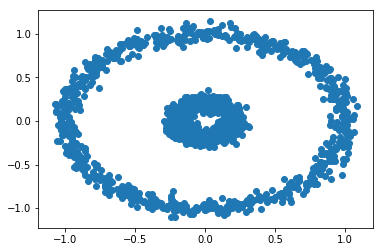

In [9]:
n_samples = 1500

noisy_circles, labels = datasets.make_circles(n_samples=n_samples, factor=.2,
                                      noise=.05)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1])

### Se pueden ir probando distintos valores de Gamma hasta encontrar alguno adecuado

In [10]:
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", gamma = 13).fit(noisy_circles)

### Con la matriz de afinidad se pueden graficar los puntos en k-dimensiones (k autovectores de la matriz laplaciana). Se puede notar qué tan bien separados quedan los puntos para luego poder ser clusterizados por K-Means o algún otro algoritmo

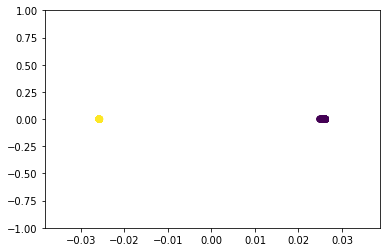

In [17]:
matriz_laplaciana = csgraph.laplacian(clustering.affinity_matrix_, normed=False)

eigenValues, eigenVectors = LA.eig(matriz_laplaciana)

idx = eigenValues.argsort()[::1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
firstEigenVector = eigenVectors[:,1]

#Podemos graficar sobre el eje X las componentes del primer autovector
plt.ylim(-1,1)
plt.scatter(eigenVectors[:,1], [0]*eigenVectors[:,1].size, c=labels)

### Finalmente, ahora podemos asignar a qué clusters pertenece cada punto del set. Se nota claramente cómo quedan asignados el cluster amarillo y el violeta

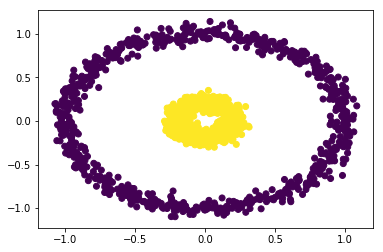

In [18]:
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=clustering.labels_)

## Clusters en forma de "media luna"

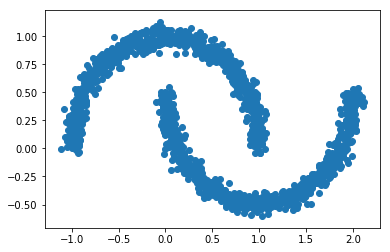

In [19]:
noisy_moons, labels = datasets.make_moons(n_samples=n_samples, noise=.05)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])

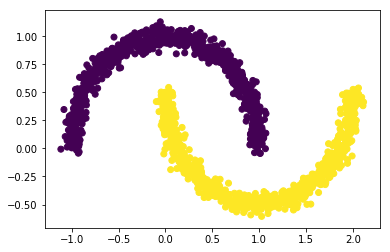

In [20]:
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", gamma = 13.0).fit(noisy_moons)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=clustering.labels_)